In [2]:
from sympy import *
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
import multiprocessing as mp

### Calculate derivatives in sympy.

In [2]:
# set symbols
sig, ls, xi, x0, yi, y0, zi, z0, xj, x0p, yj, y0p, zj, z0p = \
    symbols('sig, ls, xi, x0, yi, y0, zi, z0, xj, x0p, yj, y0p, zj, z0p')

In [3]:
# define energy kernel
tb_kern = sig**2*exp(-(sqrt((xi-x0)**2+(yi-y0)**2+(zi-z0)**2)-\
                       sqrt((xj-x0p)**2+(yj-y0p)**2+(zj-z0p)**2))**2/(2*ls**2))

In [4]:
# compute kernel derivatives
tb_xx = diff(tb_kern, x0, x0p)
tb_xy = diff(tb_kern, x0, y0p)
tb_xz = diff(tb_kern, x0, z0p)
tb_yx = diff(tb_kern, y0, x0p)
tb_yy = diff(tb_kern, y0, y0p)
tb_yz = diff(tb_kern, y0, z0p)
tb_zx = diff(tb_kern, z0, x0p)
tb_zy = diff(tb_kern, z0, y0p)
tb_zz = diff(tb_kern, z0, z0p)

In [5]:
tb_xx

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(x0 - xi)*(x0p - xj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [6]:
tb_xy

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(x0 - xi)*(y0p - yj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [7]:
tb_xz

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(x0 - xi)*(z0p - zj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [8]:
tb_yx

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(x0p - xj)*(y0 - yi)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [9]:
tb_yy

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(y0 - yi)*(y0p - yj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [10]:
tb_yz

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(y0 - yi)*(z0p - zj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

In [11]:
tb_zz

sig**2*(1 - (sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*(z0 - zi)*(z0p - zj)*exp(-(sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/(2*ls**2))/(ls**2*sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))

### Define two-body kernel.

In [12]:
def cov_func(sig, ls, xi, x0, yi, y0, zi, z0, xj, x0p, yj, y0p, zj, z0p, d1, d2):
    base = sig**2*(1 - (np.sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2) - np.sqrt((x0p - xj)**2 + \
            (y0p - yj)**2 + (z0p - zj)**2))**2/ls**2)*np.exp(-(np.sqrt((x0 - xi)**2 + \
            (y0 - yi)**2 + (z0 - zi)**2) - np.sqrt((x0p - xj)**2 + (y0p - yj)**2 + (z0p - zj)**2))**2/\
            (2*ls**2))/(ls**2*np.sqrt((x0 - xi)**2 + (y0 - yi)**2 + (z0 - zi)**2)*np.sqrt((x0p - xj)**2 + \
            (y0p - yj)**2 + (z0p - zj)**2))
    
    if d1==1 and d2==1:
        cov = base * (x0 - xi)*(x0p - xj)
    elif d1==1 and d2==2:
        cov = base * (x0 - xi)*(y0p - yj)
    elif d1==1 and d2==3:
        cov = base * (x0 - xi)*(z0p - zj)
    elif d1==2 and d2==1:
        cov = base * (y0 - yi)*(x0p - xj)
    elif d1==2 and d2==2:
        cov = base * (y0 - yi)*(y0p - yj)
    elif d1==2 and d2==3:
        cov = base * (y0 - yi)*(z0p - zj)
    elif d1==3 and d2==1:
        cov = base * (z0 - zi)*(x0p - xj)
    elif d1==3 and d2==2:
        cov = base * (z0 - zi)*(y0p - yj)
    elif d1==3 and d2==3:
        cov = base * (z0 - zi)*(z0p - zj)
        
    return cov

In [13]:
# 1 = partial wrt x
# 2 = partial wrt y
# 3 = partial wrt z
# x1, x2 are 3xN matrices of Cartesian coordinates with central atom at the origin
def tb_kernel(x1, x2, d1, d2, sig, ls):
    # central atom assumed to be at the origin
    x0, y0, z0, x0p, y0p, z0p = [0,0,0,0,0,0]
    
    # loop over atoms
    tot_kern = 0
    for m in range(x1.shape[1]):
        xi = x1[0,m]
        yi = x1[1,m]
        zi = x1[2,m]
        
        for n in range(x2.shape[1]):
            xj = x2[0,n]
            yj = x2[1,n]
            zj = x2[2,n]
            
            # calculate covariance for given pair
            cov = cov_func(sig, ls, xi, x0, yi, y0, zi, z0, \
                           xj, x0p, yj, y0p, zj, z0p, d1, d2)
            tot_kern += cov
            
    return tot_kern

In [14]:
# get two body kernel (two derivatives)
# x1, x2 are 4xN matrices containing distances and Cartesian coordinate differences
def tb_kern(x1, x2, d1, d2, sig, ls):
    # loop over atoms
    tot_kern = 0
    for m in range(x1.shape[1]):
        dist1 = x1[0,m]
        coord1 = x1[d1,m]
        for n in range(x2.shape[1]): 
            dist2 = x2[0,n]
            coord2 = x2[d2,n]
            
            # calculate covariance for current pair of atoms
            base = sig**2*np.exp(-(dist1-dist2)**2/(2*ls**2))
            doub_fac = -ls**2+(dist1-dist2)**2
            kern = -base*coord1*coord2*doub_fac/(dist1*dist2*ls**4)
            
            tot_kern+=kern

    return tot_kern

In [15]:
def tb_kern_fast(dist1, dist2, coord1, coord2, sig, ls):
    # calculate covariance for current pair of atoms
    kern = -(sig**2*np.exp(-(dist1-dist2)**2/(2*ls**2)))*\
            coord1*coord2*(-ls**2+(dist1-dist2)**2)/\
            (dist1*dist2*ls**4)
    
    return np.sum(kern)

In [16]:
# get 3Nx3N noiseless kernel matrix
# assume all 3 force components are known for each configuration
# X is assumed to be a list of 4xN arrays
def get_K(X,sig,ls,noise):
    # initialize matrix
    size = len(X)*3
    K = np.zeros([size, size])
    
    # calculate elements
    for m in range(size):
        x1 = X[int(floor(m/3))]
        d1 = m%3+1
        for n in range(m,size):
            x2 = X[int(floor(n/3))]
            d2 = n%3+1
           
            # calculate kernel
            cov = tb_kern(x1, x2, d1, d2, sig, ls)
            K[m,n] = cov
            K[n,m] = cov
    # perform cholesky decomposition
    L = np.linalg.cholesky(K+noise**2*np.eye(size))
    
    return K, L

In [17]:
# get kernel vector
def get_kv(X,x,d1,sig,ls):
    size = len(X)*3
    kv=np.zeros([size,1])
    for m in range(size):
        x2 = X[int(floor(m/3))]
        d2 = m%3+1
        kv[m]=tb_kern(x,x2,d1,d2,sig,ls)
        
    return kv

In [18]:
# get alpha
def get_alpha(K,L,y): 
    # get alpha
    ts1 = sp.linalg.solve_triangular(L,y,lower=True)
    alpha = sp.linalg.solve_triangular(L.transpose(),ts1)
            
    return alpha

In [19]:
# get likelihood
def get_like(K,L,y,alpha): 
    # get log marginal likelihood
    like = -(1/2)*np.matmul(y.transpose(),alpha)-\
            np.sum(np.log(np.diagonal(L)))-\
            np.log(2*np.pi)*K.shape[1]/2
            
    return like

# get likelihood as a function of hyperparameters
def like_hyp(hyp,X,y):
    # unpack hyperparameters
    sig = hyp[0]
    ls = hyp[1]
    noise = hyp[2]
    
    # calculate likelihood
    K, L = get_K(X,sig,ls,noise)
    alpha = get_alpha(K,L,y)
    like = get_like(K,L,y,alpha)
    
    # print
    print('sig: '+str(sig))
    print('ls: '+str(ls))
    print('noise: '+str(noise))
    print('log like: '+str(like))
    
    return like

# get minus likelihood as a function of hyperparameters
def minus_like_hyp(hyp,X,y):
    like = like_hyp(hyp,X,y)
    minus_like = -like
    return minus_like

# monitor likelihood
def like_hyp_mon(hyp,X,y):
    # unpack hyperparameters
    sig = hyp[0]
    ls = hyp[1]
    noise = hyp[2]
    
    # calculate likelihood
    time0 = time.time()
    K, L = get_K(X,sig,ls,noise)
    time1 = time.time()
    alpha = get_alpha(K,L,y)
    time2 = time.time()
    like = get_like(K,L,y,alpha)
    time3 = time.time()
    
    # record times
    K_time = time1-time0
    alph_time = time2-time1
    like_time = time3-time2
    
    
    # print parameters and likelihood
    print('sig: '+str(sig))
    print('ls: '+str(ls))
    print('noise: '+str(noise))
    print('log like: '+str(like))
    
    return like, K_time, alph_time, like_time

In [20]:
# make GP prediction with SE kernel
def GP_pred(X,y,K,L,alpha,sig,ls,xt,d):
    # get kernel vector
    kv = get_kv(X,xt,d,sig,ls)
    
    # get predictive mean
    f = np.matmul(kv.transpose(),alpha)
    
    # get predictive variance
    v = sp.linalg.solve_triangular(L,kv,lower=True)
    self_kern = tb_kern(xt, xt, d, d, sig, ls)
    var = self_kern - np.matmul(v.transpose(),v)
    
    return f, var

### Compare kernels.

In [21]:
X = [np.array([[1,-1,-5],[2,2,7],[5,3,1]])]

In [22]:
X[0]

array([[ 1, -1, -5],
       [ 2,  2,  7],
       [ 5,  3,  1]])

In [23]:
# try kernel 1
x1 = np.array([[0.5,0,0],[0,0.75,0],[0,0,1]])
x2 = np.array([[-1.5,0,0],[0,-1,0],[0,0,1]])
sig = 1
ls = 1
d1 = 2
d2 = 2

time1 = time.time()
kern = tb_kernel(x1, x2, d1, d2, sig, ls)
time2 = time.time()
print(kern)
print(time2-time1)

-0.9086561573215726
0.0002338886260986328


In [24]:
# try kernel 2
v1 = np.array([[0.5,0.75,1],[-0.5,0,0],[0,-0.75,0],[0,0,-1]])
v2 = np.array([[1.5,1,1],[1.5,0,0],[0,1,0],[0,0,-1]])

time1 = time.time()
kern = tb_kern(v1, v2, d1, d2, sig, ls)
time2 = time.time()
print(kern)
print(time2-time1)

-0.9086561573215727
0.00010824203491210938


In [25]:
# try kernel 3
v1 = np.array([[0.5,0.75,1],[-0.5,0,0],[0,-0.75,0],[0,0,-1]])
v2 = np.array([[1.5,1,1],[1.5,0,0],[0,1,0],[0,0,-1]])

dist1 = v1[0,:]
dist2 = v2[0,:]
coord1 = v1[d1,:]
coord2 = v2[d2,:]

time1 = time.time()
kern = tb_kern_fast(dist1, dist2, coord1, coord2, sig, ls)
time2 = time.time()
print(kern)
print(time2-time1)


-0.9086561573215727
0.0005009174346923828


In [26]:
x1 = v1
x2 = v2

dist1 = x1[0,:]
dist2 = x2[0,:]
coord1 = x1[d1,:]
coord2 = x2[d2,:]

# calculate covariance for current pair of atoms
base = sig**2*np.exp(-(dist1-dist2)**2/(2*ls**2))
doub_fac = -ls**2+(dist1-dist2)**2
kern = -base*coord1*coord2*doub_fac/(dist1*dist2*ls**4)

print(kern)

return np.sum(kern)

[-0.         -0.90865616  0.        ]


SyntaxError: 'return' outside function (<ipython-input-26-9fad5d7b89f0>, line 16)

### Test two-body kernel.

In [27]:
# rotate input vector by angle theta
def rotate_xy(x, theta):
    new_x = np.zeros(x.shape)
    for n in range(x.shape[1]):
        vec = x[:,n]
        x_new = np.cos(theta)*vec[1]-np.sin(theta)*vec[2]
        y_new = np.sin(theta)*vec[1]+np.cos(theta)*vec[2]
        new_x[0,n]=x[0,n]
        new_x[1,n]=x_new
        new_x[2,n]=y_new
        new_x[3,n]=x[3,n]
    return new_x

def rotate_vec(x,theta):
    new_x = np.zeros(x.shape)
    for n in range(x.shape[1]):
        vec = x[:,n]
        x_new = np.cos(theta)*vec[0]-np.sin(theta)*vec[1]
        y_new = np.sin(theta)*vec[0]+np.cos(theta)*vec[1]
        new_x[0,n]=x_new
        new_x[1,n]=y_new
        new_x[2,n]=x[2,n]
    return new_x

In [28]:
# create sample training data (one atom, three force components)
X = [v1]

# y = np.array([[-0.5],[0],[0]])+\
# 0.4*np.array([[0],[-0.75],[0]])+\
# 0.5*np.array([[0],[0],[-1]])

y = np.array([[1],[2],[3]])

[sig,ls]=[1,1]

In [29]:
# make prediction on rotated input
K, L = get_K(X,sig,ls)
alpha = get_alpha(K,L,y)

d=2
ang = 2
xt = rotate_xy(X[0],ang)
# xt = np.array([[10],[1],[2],[2]])

GP_pred(X,y,K,L,alpha,sig,ls,xt,d)

TypeError: get_K() missing 1 required positional argument: 'noise'

In [ ]:
# check rotated force
rotate_vec(y,ang)

### Test on MD data.

In [30]:
def parse_qe_pwscf_md_output(outfile):
#def parse_qe_pwscf_md_output(path):

    steps={}

    # Get the lines out of the file first
    with open(outfile, 'r') as outf:
        lines = outf.readlines()

    # Because every step is marked by a total energy printing with the !
    # as the first character of the line, partition the file of output
    # into all different chunks of run data

    # Get the indexes to carve up the document later
    split_indexes=[N for N in range(len(lines)) if '!'==lines[N][0]]

    # Cut out the first chunk 
    # TODO: Analyze first chunk
    first_chunk=lines[0:split_indexes[0]]

    step_chunks = []
    # Carve up into chunks
    for n in range(len(split_indexes)):
        step_chunks.append(lines[split_indexes[n]:split_indexes[n+1] if n!=len(split_indexes)-1 else len(lines)]) 



    # Iterate through chunks
    for current_chunk in step_chunks:


        # Iterate through to find the bounds of regions of interest

        # Forces
        force_start_line = [line for line in current_chunk if 'Forces acting on atoms' in line][0]
        force_end_line   = [line for line in current_chunk if 'Total force' in line][0]
        force_start_index = current_chunk.index(force_start_line)+2
        force_end_index = current_chunk.index(force_end_line)-2

        # Positions
        atoms_start_line = [line for line in current_chunk if 'ATOMIC_POSITIONS' in line][0]
        atoms_end_line   = [line for line in current_chunk if 'kinetic energy' in line][0]
        atoms_start_index = current_chunk.index(atoms_start_line)+1
        atoms_end_index = current_chunk.index(atoms_end_line)-3

        # Misc Facts
        temperature_line = [ line for line in current_chunk if 'temperature' in line][0]
        dyn_line = [line for line in current_chunk if 'Entering Dynamics' in line][0]
        dyn_index = current_chunk.index(dyn_line)
        time_index = dyn_index+1

        # Parse through said regions of interest to get the information out

        forces = []
        for line in current_chunk[force_start_index:force_end_index+1]:
            forceline= line.split('=')[-1].split()
            forces.append([float(forceline[0]),float(forceline[1]),float(forceline[2])])
        total_force = float(force_end_line.split('=')[1].strip().split()[0])
        SCF_corr    = float(force_end_line.split('=')[2].strip()[0])


        positions =[]
        elements=[]
        for line in current_chunk[atoms_start_index:atoms_end_index+1]:
            atomline = line.split()
            elements.append(atomline[0])
            positions.append([float(atomline[1]),float(atomline[2]),float(atomline[3])])

        # Get Misc info 
        toten = float(current_chunk[0].split('=')[-1].strip().split()[0])
        temperature_line = temperature_line.split('=')[-1]
        temperature = float(temperature_line.split()[0])
        iteration = int(dyn_line.split('=')[-1])
        timeline = current_chunk[time_index].split('=')[-1].strip().split()[0]
        time = float( timeline)
        Ekin = float(atoms_end_line.split('=')[1].strip().split()[0])


        # Record the data associated with this step
        steps[iteration]={'iteration':iteration,
                           'forces':forces, 
                           'positions':positions,
                           'elements':elements,
                           'temperature':temperature,
                           'time':time,
                           'energy':toten,
                           'ekin':Ekin,
                           'kinetic energy':Ekin,
                           'total energy':toten,
                           'total force':total_force,
                           'SCF correction':SCF_corr}

    return(steps)

In [31]:
outfile ='/Users/jonpvandermause/Research/GP/ML-electron-density/Si_Supercell_MD/si.md.out'
Si_MD_Parsed = parse_qe_pwscf_md_output(outfile)

In [32]:
tstep = 20 * 4.83776865301828e-17

In [33]:
ens = []
times = [tstep * n for n in range(1000)]
for n in range(1000):   
    en = Si_MD_Parsed[n+1]['energy']
    
    ens.append(en)

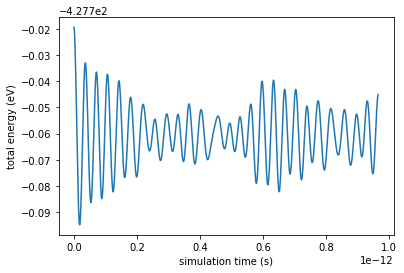

In [34]:
f = plt.figure()
plt.plot(times, ens)
plt.xlabel('simulation time (s)')
plt.ylabel('total energy (eV)')
plt.show()

f.savefig('test.pdf', format='pdf',bbox_inches='tight')

In [35]:
# given list of Cartesian coordinates, return list of atomic environments
def get_cutoff_vecs(vec, brav_mat, brav_inv, vec1, vec2, vec3, cutoff):
    # get bravais coefficients
    coeff = np.matmul(brav_inv, vec)
    
    # get bravais coefficients for atoms within one super-super-cell
    coeffs = [[],[],[]]
    for n in range(3):
        coeffs[n].append(coeff[n])
        coeffs[n].append(coeff[n]-1)
        coeffs[n].append(coeff[n]+1)

    # get vectors within cutoff
    vecs = []
    dists = []
    for m in range(len(coeffs[0])):
        for n in range(len(coeffs[1])):
            for p in range(len(coeffs[2])):
                vec_curr = coeffs[0][m]*vec1 + coeffs[1][n]*vec2 + coeffs[2][p]*vec3
                
                dist = np.linalg.norm(vec_curr)

                if dist < cutoff:
                    vecs.append(vec_curr)
                    dists.append(dist)
                    
    return vecs, dists

In [36]:
# given list of cartesian coordinates, get chemical environment of specified atom
# pos = list of cartesian coordinates
def get_env(pos, atom, brav_mat, brav_inv, vec1, vec2, vec3, cutoff):
    env = [[],[],[],[]]
    pos_atom = np.array(pos[atom]).reshape(3,1)
    
    # loop through positions to find all atoms and images in the neighborhood
    for n in range(len(pos)):
        # position relative to reference atom
        diff_curr = np.array(pos[n]).reshape(3,1) - pos_atom

        # get images within cutoff
        vecs, dists = get_cutoff_vecs(diff_curr, brav_mat, \
            brav_inv, vec1, vec2, vec3, cutoff)

        for vec, dist in zip(vecs, dists):
            # ignore self interaction
            if dist != 0:
                # append distance
                env[0].append(dist)
                
                # append coordinate differences
                env[1].append(-vec[0][0])
                env[2].append(-vec[1][0])
                env[3].append(-vec[2][0])

    env = np.array(env)
    return env

In [37]:
# given list of cartesian coordinates, return list of chemical environments
def get_envs(pos, brav_mat, brav_inv, vec1, vec2, vec3, cutoff):
    envs = []
    for n in range(len(pos)):
        atom = n
        env = get_env(pos, atom, brav_mat, brav_inv, vec1, vec2, vec3, cutoff)
        envs.append(env)
        
    return envs

In [38]:
# set crystal structure
dim = 3
alat = 5.431
unit_cell = [[0.0, alat/2, alat/2], [alat/2, 0.0, alat/2], \
                    [alat/2, alat/2, 0.0]] # fcc primitive cell
unit_pos = [['Si',[0,0,0]],['Si',[alat/4, alat/4, alat/4]]]
brav_mat = np.array([[0.0, alat/2, alat/2], [alat/2, 0.0, alat/2], \
                    [alat/2, alat/2, 0.0]])*dim
brav_inv = np.linalg.inv(brav_mat)

# bravais vectors
vec1 = brav_mat[:,0].reshape(3,1)
vec2 = brav_mat[:,1].reshape(3,1)
vec3 = brav_mat[:,2].reshape(3,1)

In [39]:
# convert list of triplets to column vector
def fc_conv(fcs):
    comp_len = len(fcs)*3
    comps = []
    for n in range(comp_len):
        fc_ind = int(floor(n/3))
        d = n%3
        comps.append(fcs[fc_ind][d])
    
    return np.array(comps).reshape(comp_len,1)

In [40]:
# build force field from single snapshot
cutoff = 4.5
pos = Si_MD_Parsed[1]['positions']
envs = get_envs(pos, brav_mat, brav_inv, vec1, vec2, vec3, cutoff)
fcs = fc_conv(Si_MD_Parsed[2]['forces'])

In [41]:
# get kernel matrix
sig = 1
ls = 0.1
noise = 0.01
K, L = get_K(envs,sig,ls, noise)

In [42]:
# calculate likelihood
sig = 1
ls = 1
noise = 0.001
hyp = np.array([sig, ls, noise])

like_hyp(hyp,envs,fcs)

sig: 1.0
ls: 1.0
noise: 0.001
log like: [[819.67628962]]


array([[819.67628962]])

In [43]:
# minimize minus log likelihood using Nelder-Mead
x0 = np.array([1,1,0.001])
args = (envs,fcs)
res = minimize(minus_like_hyp, x0, args, method='nelder-mead', \
               options={'xtol': 1e-8, 'disp': True})

print(res.x)

KeyboardInterrupt: 

In [ ]:
hyp = np.array([0.02084984,0.33739727,0.001])
like, K_time, alph_time, like_time = like_hyp_mon(hyp, envs, fcs)

In [ ]:
K_time

In [ ]:
alph_time

In [ ]:
like_time

### Parallelize the kernel matrix function.

In [44]:
# get row of covariances
def get_cov_row(x1, d1, m, size, X, sig, ls):
    covs = []
    for n in range(m,size):
        x2 = X[int(floor(n/3))]
        d2 = n%3+1

        # calculate kernel
        cov = tb_kern(x1, x2, d1, d2, sig, ls)
        covs.append(cov)
        
    return covs

In [45]:
def get_K_par(X,sig,ls,noise,pool):
    # initialize matrix
    size = len(X)*3
    K = np.zeros([size, size])

    # calculate elements
    results = []
    for m in range(size):
        x1 = X[int(floor(m/3))]
        d1 = m%3+1

        results.append(pool.apply_async(get_cov_row, \
            args=(x1, d1, m, size, X, sig, ls)))

    # construct covariance matrix
    for m in range(size):
        res_cur = results[m].get()
        for n in range(m,size):
            K[m,n]=res_cur[n-m]
            K[n,m]=res_cur[n-m]

    # perform cholesky decomposition
    L = np.linalg.cholesky(K+noise**2*np.eye(size))
    
    return K,L

In [52]:
# set inputs
X = envs
sig = 0.02084984
ls = 0.33739727
noise = 0.00100585
pool = mp.Pool(processes=2)

In [55]:
time0 = time.time()
test1, test2 = get_K_par(X,sig,ls,noise,pool)
time1 = time.time()

print(time1 - time0)

time0 = time.time()
test3, test4 = get_K(X,sig,ls,noise)
time1 = time.time()

print(time1 - time0)

9.892528057098389
19.57732105255127
